# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import sys
print(sys.version)

3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment
from collections import deque
from maddpg_agent import MADDPG_Agent


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [7]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 5. Train the Agent 


In [8]:
def train(n_episodes=10000, max_t=1000, path_name='method'):
    max_scores = []                    # list containing the max scores over both agents from each episode
    scores_deque = deque(maxlen=100)   # last 100 max_scores
    scores_deque_mean = []             # list containing the mean of trailing scores window 
    solved = False                     # if the task has been solved / average score been achieved
        
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]   # reset the environment
        states = env_info.vector_observations               # get the current state
        
        scores = np.zeros(num_agents)
        
        for t in range(max_t):
            actions = agent.act(states)
            
            env_info = env.step(actions)[brain_name]       # send the actions to the environment
            next_states = env_info.vector_observations     # get the next states
            rewards = env_info.rewards                     # get the rewards
            dones = env_info.local_done                    # see if episode has finished
            
            agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
                
        max_score = np.max(scores)   #take max score over both agents
        max_scores.append(max_score)   
        scores_deque.append(max_score)
        scores_deque_mean.append(np.mean(scores_deque))
        
        print('\rEpisode {}\tAverage Score: {:.3f}\tMax Score of current episode: {:.3f}'.format(i_episode, np.mean(scores_deque), max_score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)))   
        if np.mean(scores_deque)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode-100, np.mean(scores_deque)))
            agent.save_model_weights(path_name)
            solved = True
            break
    return max_scores, scores_deque_mean, i_episode-100, solved



In [9]:
plt.rcParams.update({'font.size': 30})
def plot_scores(max_scores, scores_deque_mean, method, num_episodes_solved, solved=False, full_run=True):
    fig = plt.figure(figsize=(40, 20))
    ax = fig.add_subplot(111)
    if full_run:
        ax.axhline(y=0.5, xmin=0.0, xmax=1.0, color='r', linestyle='--', linewidth=2.0, dashes=(5, 10))
    if solved:
        ax.set_title('Max Score per episode and Mean of trailing scores window for ' + method + ' (solved in ' + str(num_episodes_solved) + ' episodes)')
    else:
        ax.set_title('Max Score per episode and Mean of trailing scores window for ' + method)
    plt.plot(np.arange(1, len(max_scores)+1), max_scores, label='max score per episode')
    plt.plot(np.arange(1, len(scores_deque_mean)+1), scores_deque_mean, label='scores window mean', c='r', linewidth=3.0)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend(loc='upper left');
    plt.show()
    fig.savefig('scores ' + method + '.png', format='png')


### 6. Study of Hyperparameters


In [10]:
# 00. baseline

Episode 100	Average Score: 0.012	Max Score of current episode: 0.000
Episode 200	Average Score: 0.005	Max Score of current episode: 0.000
Episode 300	Average Score: 0.001	Max Score of current episode: 0.000
Episode 400	Average Score: 0.011	Max Score of current episode: 0.100
Episode 500	Average Score: 0.012	Max Score of current episode: 0.000
Episode 600	Average Score: 0.045	Max Score of current episode: 0.100
Episode 700	Average Score: 0.050	Max Score of current episode: 0.000
Episode 800	Average Score: 0.069	Max Score of current episode: 0.100
Episode 900	Average Score: 0.091	Max Score of current episode: 0.190
Episode 1000	Average Score: 0.104	Max Score of current episode: 0.100
Episode 1100	Average Score: 0.110	Max Score of current episode: 0.100
Episode 1200	Average Score: 0.361	Max Score of current episode: 1.290
Episode 1226	Average Score: 0.514	Max Score of current episode: 2.300
Environment solved in 1126 episodes!	Average Score: 0.514
scores_mean[-1]: 0.514


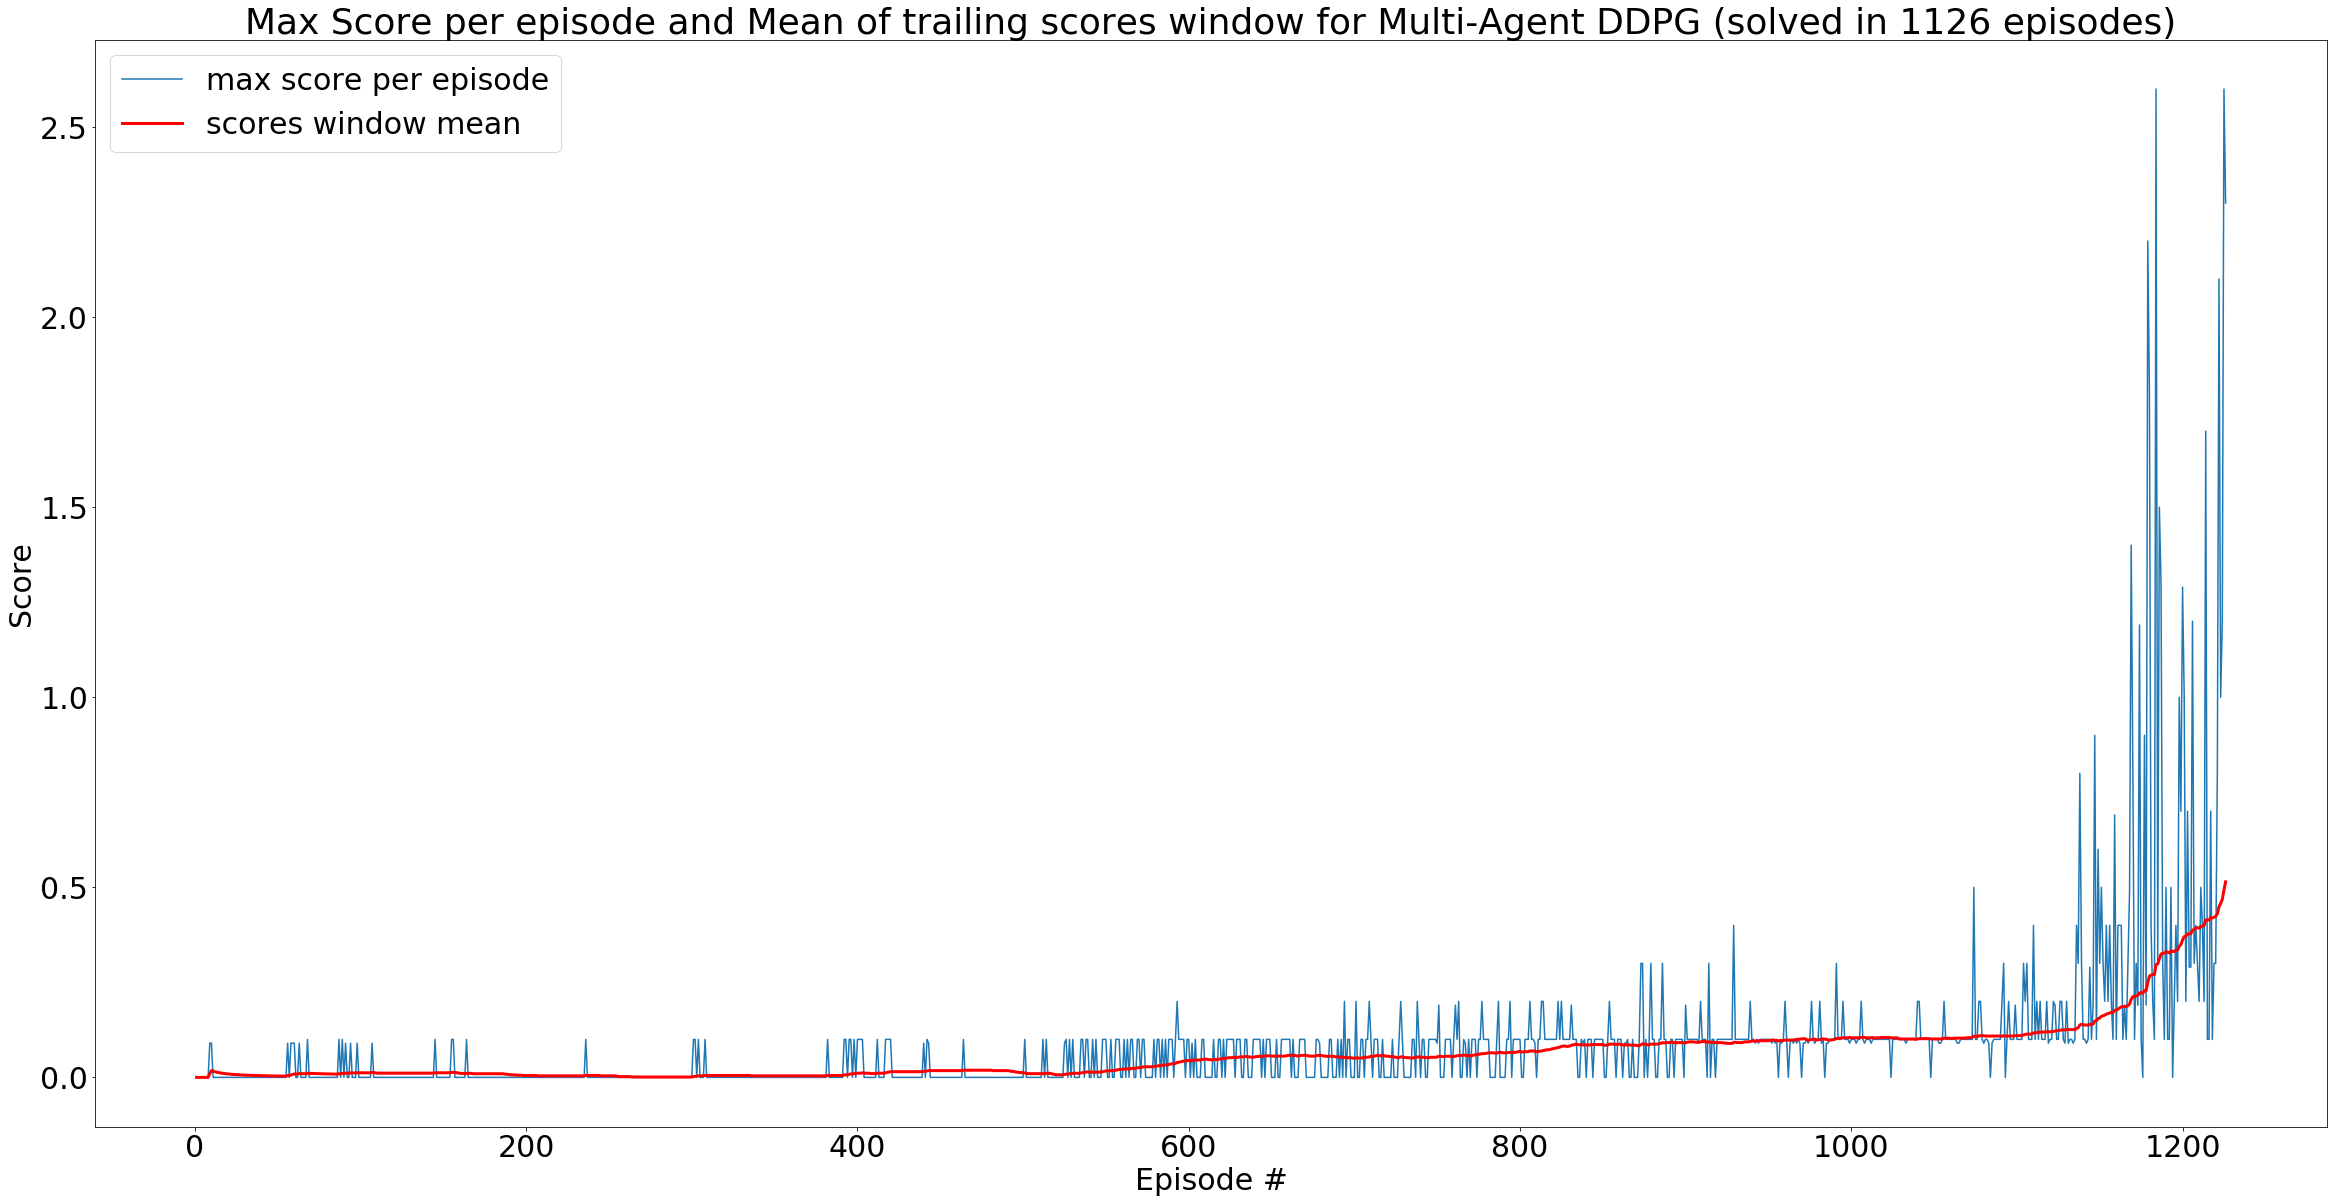

In [11]:
agent = MADDPG_Agent(num_agents, state_size, action_size)
method='Multi-Agent DDPG'

max_scores, scores_mean, num_episodes_solved, solved = train(n_episodes=3500, path_name=method)
    
print('\rscores_mean[-1]: {:.3f}'.format(scores_mean[-1]))
plot_scores(max_scores, scores_mean, method, num_episodes_solved, solved, full_run=False)

